# imdb dict analysis: counting genre
## counts one instance (movie, clip) with several genres as several individual instance for a genre.

In [1]:
#import matplotlib.pyplot as plt
from datacube_class import *
import json
import pandas as pd
import numpy as np

In [2]:
#set path of files 
imdb_json_path = "imdb_crawled_whole.json"
qa_json_path = "qa.json" 
ds_split_json_path = "id_ds_splits.json"
clip_exist_txt_path = "clip_exist_list.txt"

with open(imdb_json_path, "r") as imdb:
    imdb_dict = json.load(imdb)
# qa_json is list of qa's
with open(qa_json_path, "r") as qa_json:
    qa_json = qa_json.read()
    qa_list = json.loads(qa_json)
# ds_split_dict = {'train': train_ids, 'val': val_ids, 'test':test_ids}    
with open(ds_split_json_path, "r") as split:
    ds_split_dict = json.load(split)
# movie_keys_w_video_clips
with open(clip_exist_txt_path, "r") as clips:
    clip_exist_list = clips.readlines()
    clip_exist_list = [clip_exist_list[i].rstrip("\n") for i in range(len(clip_exist_list)) ] # remove linefeed 
    clip_exist_list = clip_exist_list[1:] #clip out the filename

In [3]:
#call the our core class
datacube_analysis = Datacube(imdb_dict, 
                             qa_list, 
                             ds_split_dict, 
                             clip_exist_list) 

In [4]:
result_df_dict = datacube_analysis.run_analysis()




In [5]:
n_clip = result_df_dict["n_clip"]
n_clip

,Romance,Comedy,Western,Crime,Animation,Adventure,Family,Mystery,Musical,Action,History,Film-Noir,War,Drama,Sci-Fi,Horror,Biography,Fantasy,Thriller,Music
train,1261.0,1175.0,0.0,984.0,0.0,1334.0,226.0,232.0,0.0,975.0,213.0,0.0,0.0,2374.0,348.0,127.0,203.0,1061.0,659.0,0.0
val,115.0,146.0,0.0,127.0,0.0,256.0,118.0,369.0,0.0,377.0,0.0,0.0,0.0,819.0,90.0,75.0,0.0,122.0,278.0,0.0
test,361.0,300.0,0.0,190.0,0.0,467.0,96.0,158.0,0.0,384.0,0.0,0.0,0.0,680.0,162.0,0.0,0.0,268.0,181.0,0.0


In [6]:
n_clip.T.describe()

,train,val,test
count,20.00000,20.000000,20.000000
mean,558.60000,144.600000,162.350000
std,646.98055,200.904638,194.966198
min,0.00000,0.000000,0.000000
25%,0.00000,0.000000,0.000000
50%,229.00000,102.500000,127.000000
75%,1003.25000,173.500000,276.000000
max,2374.00000,819.000000,680.000000


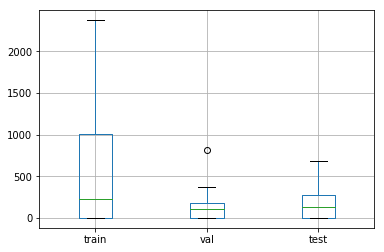

In [7]:
n_clip.T.boxplot()

In [8]:
result_df_dict["l_clip"]

,Romance,Comedy,Western,Crime,Animation,Adventure,Family,Mystery,Musical,Action,History,Film-Noir,War,Drama,Sci-Fi,Horror,Biography,Fantasy,Thriller,Music
train,98148.949,93144.112,0.0,77457.594,0.0,138429.112,23151.260,24666.168,0.0,92797.236,20200.726,0.0,0.0,212307.622,31715.562,9714.815,20540.547,108759.565,51188.159,0.0
val,9668.698,12998.565,0.0,10889.750,0.0,27166.486,7507.660,26446.914,0.0,25846.770,0.000,0.0,0.0,64961.561,8468.759,2526.448,0.000,13394.586,22513.881,0.0
test,31557.022,28285.248,0.0,13852.291,0.0,46013.716,8739.604,11430.741,0.0,34492.457,0.000,0.0,0.0,57196.852,16768.874,0.000,0.000,23780.322,15130.579,0.0


In [9]:
result_df_dict["l_clip"].T

,train,val,test
Romance,98148.949,9668.698,31557.022
Comedy,93144.112,12998.565,28285.248
Western,0.000,0.000,0.000
Crime,77457.594,10889.750,13852.291
Animation,0.000,0.000,0.000
Adventure,138429.112,27166.486,46013.716
Family,23151.260,7507.660,8739.604
Mystery,24666.168,26446.914,11430.741
Musical,0.000,0.000,0.000
Action,92797.236,25846.770,34492.457


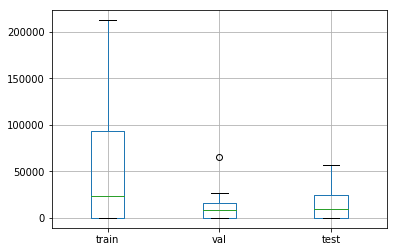

In [10]:
result_df_dict["l_clip"].T.boxplot()

In [11]:
result_df_dict["n_cl_movie"]

,Romance,Comedy,Western,Crime,Animation,Adventure,Family,Mystery,Musical,Action,History,Film-Noir,War,Drama,Sci-Fi,Horror,Biography,Fantasy,Thriller,Music
train,25.0,25.0,0.0,20.0,0.0,29.0,5.0,6.0,0.0,21.0,4.0,0.0,0.0,51.0,9.0,2.0,4.0,22.0,13.0,0.0
val,2.0,3.0,0.0,4.0,0.0,5.0,2.0,7.0,0.0,5.0,0.0,0.0,0.0,16.0,2.0,1.0,0.0,2.0,5.0,0.0
test,8.0,8.0,0.0,3.0,0.0,9.0,2.0,3.0,0.0,7.0,0.0,0.0,0.0,11.0,4.0,0.0,0.0,5.0,4.0,0.0


In [12]:
result_df_dict["n_cl_movie"].T

,train,val,test
Romance,25.0,2.0,8.0
Comedy,25.0,3.0,8.0
Western,0.0,0.0,0.0
Crime,20.0,4.0,3.0
Animation,0.0,0.0,0.0
Adventure,29.0,5.0,9.0
Family,5.0,2.0,2.0
Mystery,6.0,7.0,3.0
Musical,0.0,0.0,0.0
Action,21.0,5.0,7.0


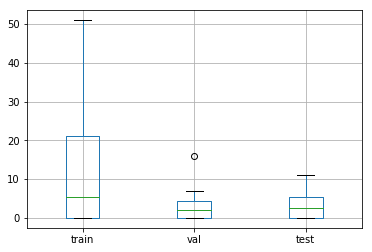

In [13]:
result_df_dict["n_cl_movie"].T.boxplot()

In [14]:
result_df_dict["n_movie"]

,Romance,Comedy,Western,Crime,Animation,Adventure,Family,Mystery,Musical,Action,History,Film-Noir,War,Drama,Sci-Fi,Horror,Biography,Fantasy,Thriller,Music
train,82.0,87.0,1.0,48.0,6.0,67.0,9.0,23.0,0.0,58.0,11.0,0.0,1.0,155.0,35.0,5.0,21.0,34.0,44.0,5.0
val,10.0,17.0,0.0,9.0,1.0,14.0,6.0,9.0,0.0,12.0,2.0,1.0,1.0,39.0,3.0,1.0,4.0,10.0,6.0,0.0
test,24.0,29.0,0.0,14.0,4.0,22.0,4.0,7.0,2.0,19.0,3.0,0.0,1.0,44.0,12.0,4.0,5.0,11.0,12.0,0.0


In [15]:
result_df_dict["n_movie"].T

,train,val,test
Romance,82.0,10.0,24.0
Comedy,87.0,17.0,29.0
Western,1.0,0.0,0.0
Crime,48.0,9.0,14.0
Animation,6.0,1.0,4.0
Adventure,67.0,14.0,22.0
Family,9.0,6.0,4.0
Mystery,23.0,9.0,7.0
Musical,0.0,0.0,2.0
Action,58.0,12.0,19.0


In [16]:
result_df_dict["n_movie"].T.boxplot

<bound method boxplot_frame of            train   val  test
Romance     82.0  10.0  24.0
Comedy      87.0  17.0  29.0
Western      1.0   0.0   0.0
Crime       48.0   9.0  14.0
Animation    6.0   1.0   4.0
Adventure   67.0  14.0  22.0
Family       9.0   6.0   4.0
Mystery     23.0   9.0   7.0
Musical      0.0   0.0   2.0
Action      58.0  12.0  19.0
History     11.0   2.0   3.0
Film-Noir    0.0   1.0   0.0
War          1.0   1.0   1.0
Drama      155.0  39.0  44.0
Sci-Fi      35.0   3.0  12.0
Horror       5.0   1.0   4.0
Biography   21.0   4.0   5.0
Fantasy     34.0  10.0  11.0
Thriller    44.0   6.0  12.0
Music        5.0   0.0   0.0>

In [17]:
result_df_dict["n_qa"]

,Romance,Comedy,Western,Crime,Animation,Adventure,Family,Mystery,Musical,Action,History,Film-Noir,War,Drama,Sci-Fi,Horror,Biography,Fantasy,Thriller,Music
train,2709.0,2906.0,4.0,1784.0,275.0,3008.0,366.0,864.0,0.0,2518.0,432.0,0.0,23.0,5322.0,1217.0,239.0,579.0,1652.0,1502.0,100.0
val,262.0,494.0,0.0,218.0,56.0,656.0,257.0,380.0,0.0,588.0,49.0,4.0,35.0,1217.0,185.0,39.0,69.0,405.0,283.0,0.0
test,697.0,960.0,0.0,487.0,186.0,1013.0,257.0,316.0,26.0,754.0,72.0,0.0,56.0,1536.0,450.0,177.0,121.0,548.0,523.0,0.0


In [18]:
result_df_dict["n_qa"].T

,train,val,test
Romance,2709.0,262.0,697.0
Comedy,2906.0,494.0,960.0
Western,4.0,0.0,0.0
Crime,1784.0,218.0,487.0
Animation,275.0,56.0,186.0
Adventure,3008.0,656.0,1013.0
Family,366.0,257.0,257.0
Mystery,864.0,380.0,316.0
Musical,0.0,0.0,26.0
Action,2518.0,588.0,754.0


In [19]:
result_df_dict["n_qa"].T.boxplot

<bound method boxplot_frame of             train     val    test
Romance    2709.0   262.0   697.0
Comedy     2906.0   494.0   960.0
Western       4.0     0.0     0.0
Crime      1784.0   218.0   487.0
Animation   275.0    56.0   186.0
Adventure  3008.0   656.0  1013.0
Family      366.0   257.0   257.0
Mystery     864.0   380.0   316.0
Musical       0.0     0.0    26.0
Action     2518.0   588.0   754.0
History     432.0    49.0    72.0
Film-Noir     0.0     4.0     0.0
War          23.0    35.0    56.0
Drama      5322.0  1217.0  1536.0
Sci-Fi     1217.0   185.0   450.0
Horror      239.0    39.0   177.0
Biography   579.0    69.0   121.0
Fantasy    1652.0   405.0   548.0
Thriller   1502.0   283.0   523.0
Music       100.0     0.0     0.0>

In [20]:
result_df_dict["n_cl_qa"]

,Romance,Comedy,Western,Crime,Animation,Adventure,Family,Mystery,Musical,Action,History,Film-Noir,War,Drama,Sci-Fi,Horror,Biography,Fantasy,Thriller,Music
train,1244.0,1251.0,0.0,1033.0,0.0,1682.0,244.0,325.0,0.0,1236.0,240.0,0.0,0.0,2507.0,414.0,127.0,186.0,1253.0,601.0,0.0
val,88.0,126.0,0.0,108.0,0.0,291.0,121.0,313.0,0.0,309.0,0.0,0.0,0.0,683.0,132.0,39.0,0.0,118.0,244.0,0.0
test,394.0,404.0,0.0,185.0,0.0,518.0,147.0,161.0,0.0,422.0,0.0,0.0,0.0,683.0,204.0,0.0,0.0,340.0,245.0,0.0


In [21]:
result_df_dict["n_cl_qa"].T

,train,val,test
Romance,1244.0,88.0,394.0
Comedy,1251.0,126.0,404.0
Western,0.0,0.0,0.0
Crime,1033.0,108.0,185.0
Animation,0.0,0.0,0.0
Adventure,1682.0,291.0,518.0
Family,244.0,121.0,147.0
Mystery,325.0,313.0,161.0
Musical,0.0,0.0,0.0
Action,1236.0,309.0,422.0


In [22]:
result_df_dict["n_cl_qa"].T.boxplot

<bound method boxplot_frame of             train    val   test
Romance    1244.0   88.0  394.0
Comedy     1251.0  126.0  404.0
Western       0.0    0.0    0.0
Crime      1033.0  108.0  185.0
Animation     0.0    0.0    0.0
Adventure  1682.0  291.0  518.0
Family      244.0  121.0  147.0
Mystery     325.0  313.0  161.0
Musical       0.0    0.0    0.0
Action     1236.0  309.0  422.0
History     240.0    0.0    0.0
Film-Noir     0.0    0.0    0.0
War           0.0    0.0    0.0
Drama      2507.0  683.0  683.0
Sci-Fi      414.0  132.0  204.0
Horror      127.0   39.0    0.0
Biography   186.0    0.0    0.0
Fantasy    1253.0  118.0  340.0
Thriller    601.0  244.0  245.0
Music         0.0    0.0    0.0>

/home/seonils/anaconda3/envs/dl/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


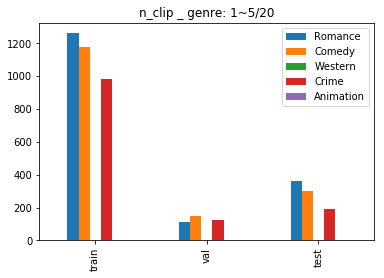

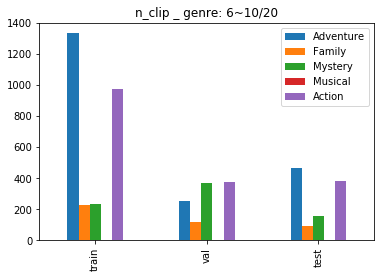

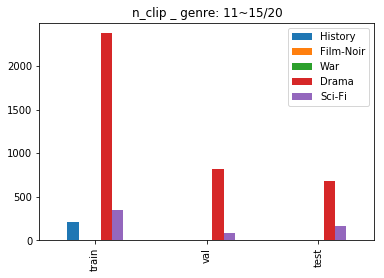

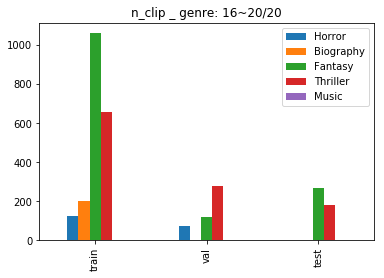

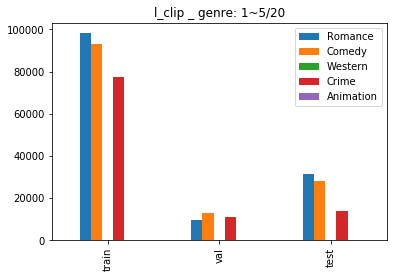

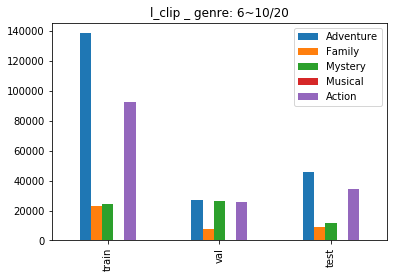

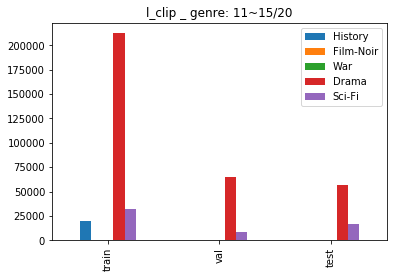

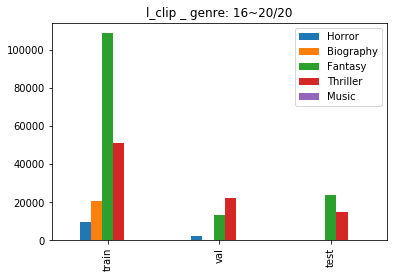

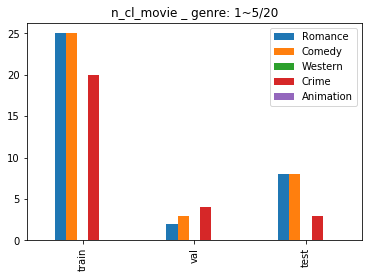

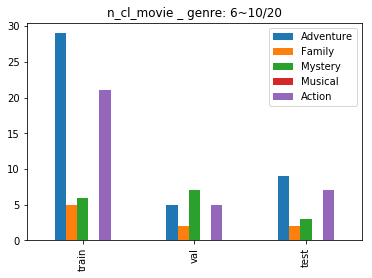

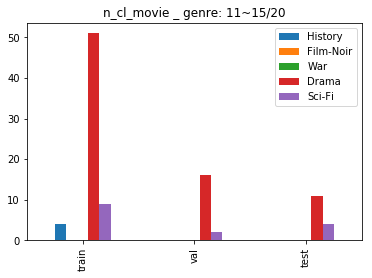

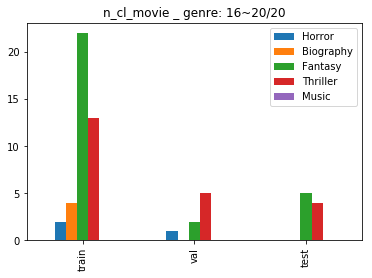

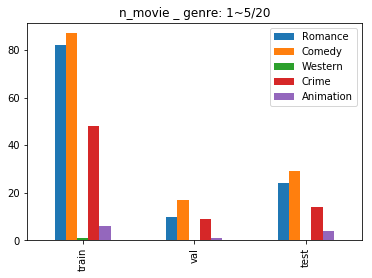

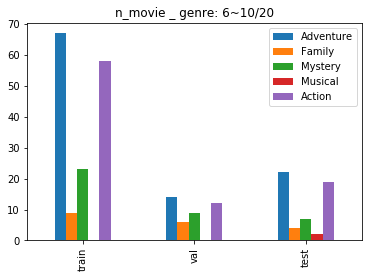

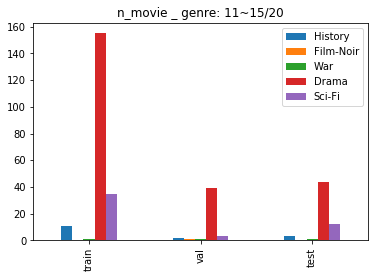

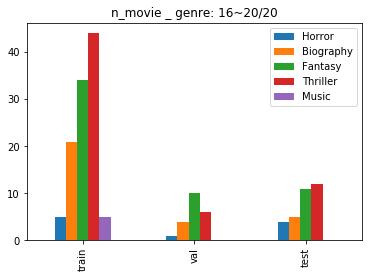

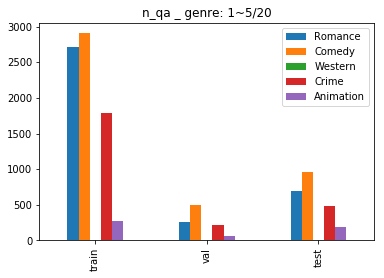

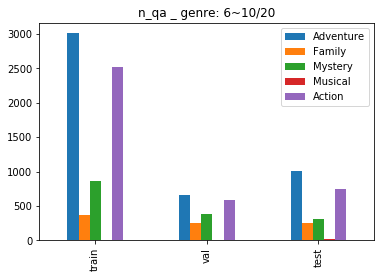

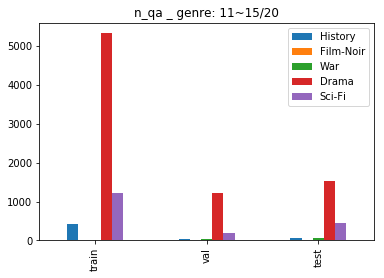

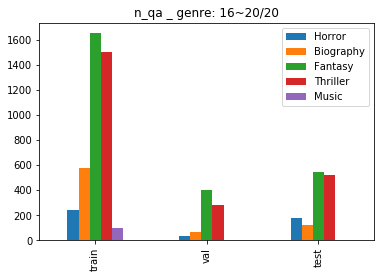

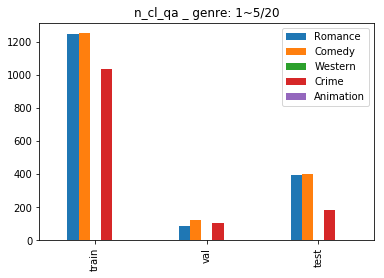

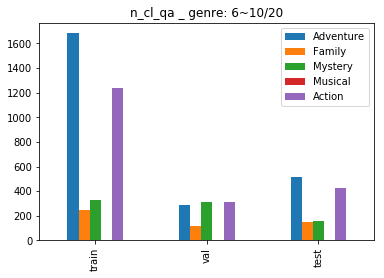

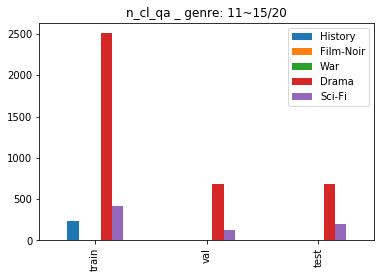

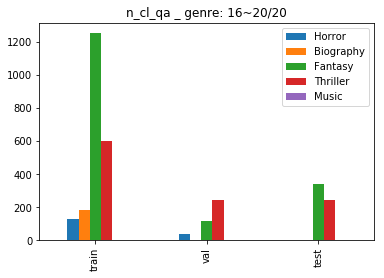

In [24]:
for j in range(6):
    for i in range(2):
        entity_now = datacube_analysis.entity_list[j]
        datacube_analysis.show(result_df_dict, entity_now, i, stacked=False)
